## K-Nearest Neighbors 
#### Using K-Nearest Neighbor to classify image from the CIFAR-10 dataset.

In [1]:
import cifar10
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math

cifar10.maybe_download_and_extract()

class_names = cifar10.load_class_names()
print(class_names)

Data has apparently already been downloaded and unpacked.
Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch
Size of:
- Training-set:		50000
- Test-set:		10000


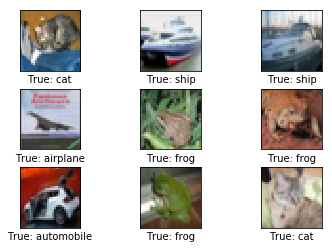

In [14]:
images_train, cls_train, labels_train = cifar10.load_training_data()
images_test, cls_test, labels_test = cifar10.load_test_data()
print("Size of:")
print("- Training-set:\t\t{}".format(len(images_train)))
print("- Test-set:\t\t{}".format(len(images_test)))

def plot_images(images, cls_true, cls_pred=None, smooth=True):

    assert len(images) == len(cls_true) == 9

    # Create figure with sub-plots.
    fig, axes = plt.subplots(3, 3)

    # Adjust vertical spacing if we need to print ensemble and best-net.
    if cls_pred is None:
        hspace = 0.3
    else:
        hspace = 0.6
    fig.subplots_adjust(hspace=hspace, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Interpolation type.
        if smooth:
            interpolation = 'spline16'
        else:
            interpolation = 'nearest'

        # Plot image.
        ax.imshow(images[i, :, :, :],
                  interpolation=interpolation)
            
        # Name of the true class.
        cls_true_name = class_names[cls_true[i]]

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true_name)
        else:
            # Name of the predicted class.
            cls_pred_name = class_names[cls_pred[i]]

            xlabel = "True: {0}\nPred: {1}".format(cls_true_name, cls_pred_name)

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()
    
# Get the first images from the test-set.
images = images_test[0:9]

# Get the true classes for those images.
cls_true = cls_test[0:9]

# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true, smooth=False)



###  a) Apply K-Nearest Neighbor algorithm with k = 1 on the test samples.
- Classification error rate, Pe = (Number of Wrongly Classified Test Samples / Total Number of Test Samples)

In [22]:
num_test = len(images_test)
num_train = len(images_train)
#dists = np.zeros((num_test, num_train))

num_test = 49
num_train = 199
train = images_train[0:num_train]
test = images_test[0:num_test]
dists = np.zeros((num_test, num_train))

print("Test: ", images_test.shape)
print("Trn:  ", images_train.shape)
print("Dist: ", dists.shape)

for i in range(0, num_test):
    for j in range(0, num_train):
        a_sq = 0
        for k in range(0, 3):
            for x in range(0, 32):
                for y in range(0, 32):
                    a = (test[i][x][y][k] - train[j][x][y][k])
                    a_sq = a_sq + a*a
        dists[i][j] = math.sqrt(a_sq)

Test:  (10000, 32, 32, 3)
Trn:   (50000, 32, 32, 3)
Dist:  (49, 199)


In [26]:

# images_train, cls_train, labels_train
k = [1, 2, 5, 10, 20 ]
prob_errors = []
err_count = 0
new_label = -1
visited = np.zeros(10)
n_10_n = np.zeros((10,10))
for a in range(0,5):
    idx_min = []
    err_count = 0
    new_label = -1
    for i in range(0, num_test-1):
        for j in range(0,k[a]):
            max_label_count = np.zeros(10)
            idx_min = np.argsort(np.array(dists[i]), axis=0)[:k[a]]
            for index in idx_min:
                label_idx = cls_train[index]
                max_label_count[label_idx] = max_label_count[label_idx] + 1
                new_label = np.argmax(max_label_count)
            
            ## a random image from test data and its 10 nearest neighbours
            if((k[a] == 10) & (visited[(cls_test[i])] == 0)):# & (cls_test[i])
                visited[(cls_test[i])] = 1
                n_10_n[(cls_test[i])] = idx_min
                print((cls_test[i])," Class - idx_min",idx_min)
        if((new_label != cls_test[i]) & (new_label != -1)):
            err_count = err_count+1

    prob_error = err_count/(num_test+1)
    print("\nK : ",k[a],"Probability of Error = " , 100*prob_error, "%")
    prob_errors.append(prob_error)



K :  1 Probability of Error =  80.0 %

K :  2 Probability of Error =  84.0 %

K :  5 Probability of Error =  86.0 %
3  Class - idx_min [ 82  58  75  39 177  47 130  23 173 196]
8  Class - idx_min [139 126 185 193  16  31 192 122 169 154]
0  Class - idx_min [137 185 100 144 193  15 192  69 126 189]
6  Class - idx_min [197 130  86  58  39  98 187 180 132 157]
1  Class - idx_min [ 22  54   3 180  17  10 132 196  57 124]
9  Class - idx_min [139  69 154 117 193 165 126 144 170  94]
5  Class - idx_min [  3 132 197   0  98 142 157  17  39 180]
7  Class - idx_min [132 163  22  77   3 162  10  54  96  57]
4  Class - idx_min [ 47  10 196 173 180  37  27 132  50 179]
2  Class - idx_min [ 69 117 130 196  75  82 170 121 193  58]

K :  10 Probability of Error =  86.0 %

K :  20 Probability of Error =  82.0 %


###  b) Repeat last step for k = 2, 5, 10, 20 on test
- Classification error rate, Pe = (Number of Wrongly Classified Test Samples / Total Number of Test Samples)
- Here we can see that by increasing "K" we need not gain accuracy. 
- At high value of K, there may be points which can influence the classification even though they are far

No handles with labels found to put in legend.


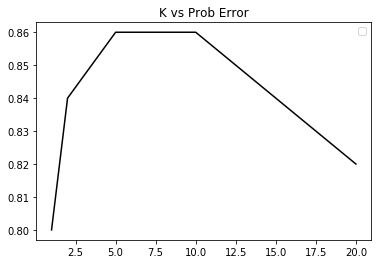

In [24]:
plt.plot(k, prob_errors, 'k-')
plt.legend()    
plt.title('K vs Prob Error')
plt.show()


### (c) For each of the ten classes, pick a random image from test data and report its 10 nearest neighbors.

#### Here are the Image indices of the 10 nearest neighbor from the test data
#### for each of the classes as computed in previous step

- 3  Class - idx_min [ 82  58  75  39 177  47 130  23 173 196]
- 8  Class - idx_min [139 126 185 193  16  31 192 122 169 154]
- 0  Class - idx_min [137 185 100 144 193  15 192  69 126 189]
- 6  Class - idx_min [197 130  86  58  39  98 187 180 132 157]
- 1  Class - idx_min [ 22  54   3 180  17  10 132 196  57 124]
- 9  Class - idx_min [139  69 154 117 193 165 126 144 170  94]
- 5  Class - idx_min [  3 132 197   0  98 142 157  17  39 180]
- 7  Class - idx_min [132 163  22  77   3 162  10  54  96  57]
- 4  Class - idx_min [ 47  10 196 173 180  37  27 132  50 179]
- 2  Class - idx_min [ 69 117 130 196  75  82 170 121 193  58]

